### 0.3 Making dataset

In [1]:
%matplotlib inline

In [2]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [3]:
import src.visualization.visualize as vs
import src.features.build_features as bf
import os
import cv2
import pandas as pd
import numpy as np
from src.data.make_dataset import get_images
from src.data.make_dataset import create_dataset_added_features
from matplotlib import pyplot as plt

In [4]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [5]:
proc_data_dir = '../data/raw/'
train_image_dir = os.path.join(proc_data_dir, 'train')

In [6]:
images, labels_str = get_images(train_image_dir)

In [7]:
labels_int = []
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }
for label in labels_str:
    labels_int.append(mapping[label])

In [8]:
images = np.reshape(images,(-1,200,200,3))
labels = np.array(labels_int)

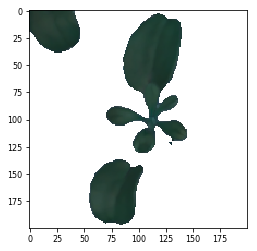

In [13]:
plt.imshow(images[0]) ##!!!!! damn 754
blur = cv2.GaussianBlur(images[0], (3, 3), 2)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
lower_green = np.array([22, 60, 0]) #second 75
upper_green = np.array([150, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
masked_img = cv2.bitwise_and(images[0], images[0], mask=opened_mask)

#masked_img = sharpen_image(masked_img)

masked_img[mask == 0] = 255

kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(masked_img,kernel,iterations = 1)

#den_image = cv2.fastNlMeansDenoisingColored(masked_img, None, 5, 5, 5, 5)
plt.imshow(dilation)

In [10]:
#dataset = create_dataset(images, labels)
dataset = create_dataset_added_features(images, labels, kind='label')

In [11]:
dataset.head(30)

,label,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,9,8528.5,4800.5,3,549.286358,77,129,0.596899,1.164683,35.377323,11.143850,13.037575,7.259825,21.846661,25.389368,14.440388,578.206775,0.956442,2.465545
0,9,9953.0,5676.5,2,508.114785,112,112,1.000000,1.260324,25.939981,14.413100,16.805250,8.528275,25.508927,29.680633,15.348275,540.818174,0.961102,2.643629
0,9,7509.0,3258.5,3,224.894442,65,66,0.984848,0.571314,6.735585,10.984475,12.646750,6.974575,23.604499,26.912500,15.163098,484.707370,0.956684,2.164022
0,9,9115.5,4469.0,3,268.793937,67,94,0.712766,0.690911,7.926080,13.150100,15.252000,7.582700,24.581632,28.391941,14.352582,400.247040,0.969716,2.292049
0,9,12326.0,7521.0,2,348.818322,104,105,0.990476,0.885932,9.871347,17.070475,19.693600,10.969550,25.956616,29.765642,17.022794,457.133220,0.972591,3.118037
0,9,10037.0,5358.5,2,291.663995,77,90,0.855556,0.690445,8.475429,15.112675,17.771425,8.975775,26.449275,30.938287,15.921722,361.933680,0.973605,2.472103
0,9,13437.0,13437.0,1,602.783831,174,158,1.101266,2.045992,27.040883,19.718750,22.715425,8.895350,28.819567,32.699556,14.459374,386.150502,0.977203,3.626843
0,9,9938.5,6750.5,2,697.168607,108,151,0.715232,1.640891,48.905174,12.048425,14.147675,7.845250,21.602008,25.231887,14.393028,697.173611,0.953785,2.677034
0,9,11648.0,5611.0,3,320.877197,91,88,1.034091,0.687500,8.839472,16.646525,19.973675,9.731875,26.342281,31.597697,15.699275,515.930695,0.966429,2.902072
0,9,7056.5,7056.5,1,602.198047,108,182,0.593407,2.785517,51.391269,9.827200,10.880650,4.603800,22.067696,24.076711,10.892287,399.372115,0.964807,2.087040


In [12]:
dataset.to_csv("data/features_resolut_200_new_seg.csv")